In [73]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette('Blues')

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [74]:
data = pd.read_csv("./data/analyze_me.csv")

### Data Observation and Cleaning

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5983 entries, 0 to 5982
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   delivery_id                          5983 non-null   int64  
 1   customer_id                          5983 non-null   int64  
 2   jumpman_id                           5983 non-null   int64  
 3   vehicle_type                         5983 non-null   object 
 4   pickup_place                         5983 non-null   object 
 5   place_category                       5100 non-null   object 
 6   item_name                            4753 non-null   object 
 7   item_quantity                        4753 non-null   float64
 8   item_category_name                   4753 non-null   object 
 9   how_long_it_took_to_order            3038 non-null   object 
 10  pickup_lat                           5983 non-null   float64
 11  pickup_lon                    

In [76]:
data.head()

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
0,1457973,327168,162381,van,Melt Shop,American,Lemonade,1.0,Beverages,00:19:58.582052,40.744607,-73.990742,40.752073,-73.985370,2014-10-26 13:51:59.898924,NaN,NaN,2014-10-26 14:52:06.313088
1,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,Neapolitan Rice Balls,3.0,Munchables,00:25:09.107093,40.723080,-73.994615,40.719722,-73.991858,2014-10-16 21:58:58.65491,2014-10-16 22:26:02.120931,2014-10-16 22:48:23.091253,2014-10-16 22:59:22.948873
2,1476547,83095,132725,bicycle,Bareburger,Burger,Bare Sodas,1.0,Drinks,00:06:44.541717,40.728478,-73.998392,40.728606,-73.995143,2014-10-28 21:39:52.654394,2014-10-28 21:37:18.793405,2014-10-28 21:59:09.98481,2014-10-28 22:04:40.634962
3,1485494,271149,157175,bicycle,Juice Press,Juice Bar,OMG! My Favorite Juice!,1.0,Cold Pressed Juices,NaN,40.738868,-74.002747,40.751257,-74.005634,2014-10-30 10:54:11.531894,2014-10-30 11:04:17.759577,2014-10-30 11:16:37.895816,2014-10-30 11:32:38.090061
4,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,Spicy Tuna & Tempura Flakes,2.0,Maki (Special Rolls),00:03:45.035418,40.726110,-74.002492,40.709323,-74.015867,2014-10-10 00:07:18.450505,2014-10-10 00:14:42.702223,2014-10-10 00:25:19.400294,2014-10-10 00:48:27.150595


In [77]:
data.isnull().sum()

delivery_id                               0
customer_id                               0
jumpman_id                                0
vehicle_type                              0
pickup_place                              0
place_category                          883
item_name                              1230
item_quantity                          1230
item_category_name                     1230
how_long_it_took_to_order              2945
pickup_lat                                0
pickup_lon                                0
dropoff_lat                               0
dropoff_lon                               0
when_the_delivery_started                 0
when_the_Jumpman_arrived_at_pickup      550
when_the_Jumpman_left_pickup            550
when_the_Jumpman_arrived_at_dropoff       0
dtype: int64

In [78]:
data[data.item_name.isnull()].head()

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
8,1487674,55375,181543,bicycle,Cafe Zaiya,NaN,NaN,NaN,NaN,NaN,40.729357,-73.990156,40.719758,-73.985011,2014-10-30 16:49:48.259935,2014-10-30 16:55:32.446053,2014-10-30 17:01:22.214264,2014-10-30 17:10:44.731901
10,1332793,104167,83565,bicycle,El Toro Blanco,Mexican,NaN,NaN,NaN,00:07:00.095332,40.728997,-74.002810,40.746060,-73.994674,2014-10-10 19:08:02.25412,2014-10-10 19:40:04.278217,2014-10-10 19:44:39.877927,2014-10-10 19:54:14.570666
16,1274468,95986,151467,bicycle,McDonald's,Fast Food,NaN,NaN,NaN,NaN,40.777940,-73.954710,40.784337,-73.953907,2014-10-01 18:17:51.625284,2014-10-01 18:18:53.498048,2014-10-01 18:34:09.732141,2014-10-01 18:42:50.967369
20,1413356,78465,158227,bicycle,Duane Reade,Drug Store,NaN,NaN,NaN,NaN,40.742876,-73.992561,40.742506,-73.992564,2014-10-21 10:08:40.392943,NaN,NaN,2014-10-21 10:27:55.756742
25,1360308,57174,61900,bicycle,Umami Burger,Burger,NaN,NaN,NaN,00:02:40.200298,40.734446,-73.998713,40.720956,-73.999281,2014-10-14 11:32:50.35313,2014-10-14 12:04:38.153601,2014-10-14 12:14:27.858646,2014-10-14 12:24:02.125908


#### Data Integrity Issue 1

We are noticing some null values in different fields. We can immediately observe missing values related to order details that can be helpful to use for user behavior and product related analysis. We should escalate to engineering that the system is not fully tracking the details. 

Furthermore, more than 50% of how_long_it_took_to_order is missing, which can be complex problem to solve since the app can be activated in users phone on background, which can skew the data. This can be improved over time. 

we have no visibility for 550 entries when a Jumpman arived at pickup location and left. Not a crucial at this moment, yet it would be one of the most important data points to determine delivery errors or to improve user experience.   

In [79]:
data.shape

(5983, 18)

In [80]:
data.duplicated().any()

True

In [81]:
data.pivot_table(index=['delivery_id'], aggfunc='size').sort_values(ascending=False)

delivery_id
1460296    5
1458212    4
1460699    4
1439953    4
1285292    4
          ..
1410187    1
1410229    1
1410230    1
1410237    1
1271706    1
Length: 5214, dtype: int64

#### Data Integrity Issue #2

We are seeing duplicates in delivery_id. We need to observe whether we should drop them or aggregate them is needed. Let's take a look. 

In [82]:
total_orders = data.delivery_id.nunique()

print(f'total number of unique order: {total_orders}')

total number of unique order: 5214


In [83]:
# checking duplicated delivery_id sample. 

data[data.delivery_id == 1460296]

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
2599,1460296,155145,39202,bicycle,La Esquina Taqueria,NaN,Bistec,1.0,Tacos,00:03:20.15586,40.721354,-73.997525,40.736889,-73.983087,2014-10-26 16:55:46.106588,2014-10-26 17:06:24.09911,2014-10-26 17:15:44.699287,2014-10-26 17:26:44.885842
3510,1460296,155145,39202,bicycle,La Esquina Taqueria,NaN,Tortilla,1.0,Soups,00:03:20.15586,40.721354,-73.997525,40.736889,-73.983087,2014-10-26 16:55:46.106588,2014-10-26 17:06:24.09911,2014-10-26 17:15:44.699287,2014-10-26 17:26:44.885842
3796,1460296,155145,39202,bicycle,La Esquina Taqueria,NaN,Chips & La Esquina's Own Salsa Roja,1.0,Plates,00:03:20.15586,40.721354,-73.997525,40.736889,-73.983087,2014-10-26 16:55:46.106588,2014-10-26 17:06:24.09911,2014-10-26 17:15:44.699287,2014-10-26 17:26:44.885842
4056,1460296,155145,39202,bicycle,La Esquina Taqueria,NaN,Canned Soda,1.0,Cold Drinks,00:03:20.15586,40.721354,-73.997525,40.736889,-73.983087,2014-10-26 16:55:46.106588,2014-10-26 17:06:24.09911,2014-10-26 17:15:44.699287,2014-10-26 17:26:44.885842
4487,1460296,155145,39202,bicycle,La Esquina Taqueria,NaN,Elotes Callejeros,1.0,Sides,00:03:20.15586,40.721354,-73.997525,40.736889,-73.983087,2014-10-26 16:55:46.106588,2014-10-26 17:06:24.09911,2014-10-26 17:15:44.699287,2014-10-26 17:26:44.885842


Multiple rows are being created due to multiple item_names in one order. We need to aggregate into one for accuracy of market performance

In [84]:
df_grouped = data.groupby(['delivery_id','customer_id'], as_index=False).agg({'pickup_place': 'count','item_quantity' : 'sum'})
df_grouped[df_grouped.delivery_id == 1460296]
df_grouped.columns = ['delivery_id', 'customer_id', 'total_items', 'item_quantity_sum']
df_grouped.sort_values(by='item_quantity_sum', ascending=False)

,delivery_id,customer_id,total_items,item_quantity_sum
2700,1380656,369608,2,30.0
7,1272382,118665,1,16.0
495,1292228,94700,1,15.0
4924,1479861,403122,1,12.0
1767,1341269,115519,2,11.0
...,...,...,...,...
1034,1313042,93086,1,0.0
2062,1354300,115238,1,0.0
1036,1313049,69928,1,0.0
4162,1448714,114821,1,0.0


In [85]:
data[data.delivery_id == 1380656]

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
1939,1380656,369608,155234,bicycle,Crif Dogs,NaN,New Yorker,15.0,Crif Dogs,NaN,40.727041,-73.983836,40.744914,-73.986621,2014-10-17 15:10:02.115325,2014-10-17 15:08:43.56924,2014-10-17 15:40:33.07672,2014-10-17 15:58:54.225365
3142,1380656,369608,155234,bicycle,Crif Dogs,NaN,The Crif Dog,15.0,Crif Dogs,NaN,40.727041,-73.983836,40.744914,-73.986621,2014-10-17 15:10:02.115325,2014-10-17 15:08:43.56924,2014-10-17 15:40:33.07672,2014-10-17 15:58:54.225365


In [86]:
data[data.delivery_id == 1457973]

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
0,1457973,327168,162381,van,Melt Shop,American,Lemonade,1.0,Beverages,00:19:58.582052,40.744607,-73.990742,40.752073,-73.98537,2014-10-26 13:51:59.898924,NaN,NaN,2014-10-26 14:52:06.313088
4763,1457973,327168,162381,van,Melt Shop,American,Turkey Truffle,1.0,Sandwiches,00:19:58.582052,40.744607,-73.990742,40.752073,-73.98537,2014-10-26 13:51:59.898924,NaN,NaN,2014-10-26 14:52:06.313088


In [87]:
merged = pd.merge(data, df_grouped, on = ['delivery_id','customer_id'], how='inner')
merged.head()


,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,total_items,item_quantity_sum
0,1457973,327168,162381,van,Melt Shop,American,Lemonade,1.0,Beverages,00:19:58.582052,40.744607,-73.990742,40.752073,-73.985370,2014-10-26 13:51:59.898924,NaN,NaN,2014-10-26 14:52:06.313088,2,2.0
1,1457973,327168,162381,van,Melt Shop,American,Turkey Truffle,1.0,Sandwiches,00:19:58.582052,40.744607,-73.990742,40.752073,-73.985370,2014-10-26 13:51:59.898924,NaN,NaN,2014-10-26 14:52:06.313088,2,2.0
2,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,Neapolitan Rice Balls,3.0,Munchables,00:25:09.107093,40.723080,-73.994615,40.719722,-73.991858,2014-10-16 21:58:58.65491,2014-10-16 22:26:02.120931,2014-10-16 22:48:23.091253,2014-10-16 22:59:22.948873,1,3.0
3,1476547,83095,132725,bicycle,Bareburger,Burger,Bare Sodas,1.0,Drinks,00:06:44.541717,40.728478,-73.998392,40.728606,-73.995143,2014-10-28 21:39:52.654394,2014-10-28 21:37:18.793405,2014-10-28 21:59:09.98481,2014-10-28 22:04:40.634962,1,1.0
4,1485494,271149,157175,bicycle,Juice Press,Juice Bar,OMG! My Favorite Juice!,1.0,Cold Pressed Juices,NaN,40.738868,-74.002747,40.751257,-74.005634,2014-10-30 10:54:11.531894,2014-10-30 11:04:17.759577,2014-10-30 11:16:37.895816,2014-10-30 11:32:38.090061,1,1.0


In [88]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5983 entries, 0 to 5982
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   delivery_id                          5983 non-null   int64  
 1   customer_id                          5983 non-null   int64  
 2   jumpman_id                           5983 non-null   int64  
 3   vehicle_type                         5983 non-null   object 
 4   pickup_place                         5983 non-null   object 
 5   place_category                       5100 non-null   object 
 6   item_name                            4753 non-null   object 
 7   item_quantity                        4753 non-null   float64
 8   item_category_name                   4753 non-null   object 
 9   how_long_it_took_to_order            3038 non-null   object 
 10  pickup_lat                           5983 non-null   float64
 11  pickup_lon                    

In [89]:
merged = merged.drop_duplicates(subset='delivery_id', keep='last')
merged.head()

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,total_items,item_quantity_sum
1,1457973,327168,162381,van,Melt Shop,American,Turkey Truffle,1.0,Sandwiches,00:19:58.582052,40.744607,-73.990742,40.752073,-73.985370,2014-10-26 13:51:59.898924,NaN,NaN,2014-10-26 14:52:06.313088,2,2.0
2,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,Neapolitan Rice Balls,3.0,Munchables,00:25:09.107093,40.723080,-73.994615,40.719722,-73.991858,2014-10-16 21:58:58.65491,2014-10-16 22:26:02.120931,2014-10-16 22:48:23.091253,2014-10-16 22:59:22.948873,1,3.0
3,1476547,83095,132725,bicycle,Bareburger,Burger,Bare Sodas,1.0,Drinks,00:06:44.541717,40.728478,-73.998392,40.728606,-73.995143,2014-10-28 21:39:52.654394,2014-10-28 21:37:18.793405,2014-10-28 21:59:09.98481,2014-10-28 22:04:40.634962,1,1.0
4,1485494,271149,157175,bicycle,Juice Press,Juice Bar,OMG! My Favorite Juice!,1.0,Cold Pressed Juices,NaN,40.738868,-74.002747,40.751257,-74.005634,2014-10-30 10:54:11.531894,2014-10-30 11:04:17.759577,2014-10-30 11:16:37.895816,2014-10-30 11:32:38.090061,1,1.0
5,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,Spicy Tuna & Tempura Flakes,2.0,Maki (Special Rolls),00:03:45.035418,40.726110,-74.002492,40.709323,-74.015867,2014-10-10 00:07:18.450505,2014-10-10 00:14:42.702223,2014-10-10 00:25:19.400294,2014-10-10 00:48:27.150595,1,2.0


In [90]:
merged = merged.drop(columns=['item_name','item_quantity','item_category_name'])
merged.head()

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,total_items,item_quantity_sum
1,1457973,327168,162381,van,Melt Shop,American,00:19:58.582052,40.744607,-73.990742,40.752073,-73.985370,2014-10-26 13:51:59.898924,NaN,NaN,2014-10-26 14:52:06.313088,2,2.0
2,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,00:25:09.107093,40.723080,-73.994615,40.719722,-73.991858,2014-10-16 21:58:58.65491,2014-10-16 22:26:02.120931,2014-10-16 22:48:23.091253,2014-10-16 22:59:22.948873,1,3.0
3,1476547,83095,132725,bicycle,Bareburger,Burger,00:06:44.541717,40.728478,-73.998392,40.728606,-73.995143,2014-10-28 21:39:52.654394,2014-10-28 21:37:18.793405,2014-10-28 21:59:09.98481,2014-10-28 22:04:40.634962,1,1.0
4,1485494,271149,157175,bicycle,Juice Press,Juice Bar,NaN,40.738868,-74.002747,40.751257,-74.005634,2014-10-30 10:54:11.531894,2014-10-30 11:04:17.759577,2014-10-30 11:16:37.895816,2014-10-30 11:32:38.090061,1,1.0
5,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,00:03:45.035418,40.726110,-74.002492,40.709323,-74.015867,2014-10-10 00:07:18.450505,2014-10-10 00:14:42.702223,2014-10-10 00:25:19.400294,2014-10-10 00:48:27.150595,1,2.0


In [91]:
master= merged 
master.shape

(5214, 17)

We removed duplicate delivery_orders, and aggregated item_names and item_quantity to be in delivery_id level. Total Orders change from 5983 to 5214.

### Exploratory Data Analysis

#### Let's look at basic metrics

In [92]:
print(f'start date: {master.when_the_delivery_started.min()}')
print(f'end date: {master.when_the_delivery_started.max()}')

start date: 2014-10-01 00:07:58.632482
end date: 2014-10-30 23:08:43.4819


#### This is 2014 October Data. Let's see how New York City performed

In [93]:
print(f'\033[1mmonthly order:\033[0m {master.delivery_id.nunique()}')
print(f'\033[1mmonthly buyer:\033[0m {master.customer_id.nunique()}')
print(f'\033[1mmonthly jumpman:\033[0m {master.jumpman_id.nunique()}')

print(f'\033[1mmonthly avg order frequency:\033[0m {round(master.delivery_id.nunique() / master.customer_id.nunique(),2)}')
print(f'\033[1mmonthly avg delivery frequency:\033[0m {round(master.delivery_id.nunique() / master.jumpman_id.nunique(),2)}')

monthly order: 5214
monthly buyer: 3192
monthly jumpman: 578
monthly avg order frequency: 1.63
monthly avg delivery frequency: 9.02


Let's see if there was any weekly growth. We will reference dropoff time and add hour and weekofmonth columns 

In [94]:
#using datetime function

master.when_the_delivery_started= pd.to_datetime(master.when_the_delivery_started)
master.when_the_Jumpman_arrived_at_pickup = pd.to_datetime(master.when_the_Jumpman_arrived_at_pickup)
master.when_the_Jumpman_left_pickup = pd.to_datetime(master.when_the_Jumpman_left_pickup)
master.when_the_Jumpman_arrived_at_dropoff= pd.to_datetime(master.when_the_Jumpman_arrived_at_dropoff)

In [95]:
master['year']=pd.DatetimeIndex(master['when_the_Jumpman_arrived_at_dropoff']).year
master['wom']=master['when_the_Jumpman_arrived_at_dropoff'].apply(lambda d: (d.day-1) // 7+1)
master['dow'] = pd.to_datetime(master.when_the_Jumpman_arrived_at_dropoff).dt.dayofweek
master['hour']=pd.DatetimeIndex(master['when_the_Jumpman_arrived_at_dropoff']).hour

master.head()

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,...,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,total_items,item_quantity_sum,year,wom,dow,hour
1,1457973,327168,162381,van,Melt Shop,American,00:19:58.582052,40.744607,-73.990742,40.752073,...,2014-10-26 13:51:59.898924,NaT,NaT,2014-10-26 14:52:06.313088,2,2.0,2014,4,6,14
2,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,00:25:09.107093,40.723080,-73.994615,40.719722,...,2014-10-16 21:58:58.654910,2014-10-16 22:26:02.120931,2014-10-16 22:48:23.091253,2014-10-16 22:59:22.948873,1,3.0,2014,3,3,22
3,1476547,83095,132725,bicycle,Bareburger,Burger,00:06:44.541717,40.728478,-73.998392,40.728606,...,2014-10-28 21:39:52.654394,2014-10-28 21:37:18.793405,2014-10-28 21:59:09.984810,2014-10-28 22:04:40.634962,1,1.0,2014,4,1,22
4,1485494,271149,157175,bicycle,Juice Press,Juice Bar,NaN,40.738868,-74.002747,40.751257,...,2014-10-30 10:54:11.531894,2014-10-30 11:04:17.759577,2014-10-30 11:16:37.895816,2014-10-30 11:32:38.090061,1,1.0,2014,5,3,11
5,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,00:03:45.035418,40.726110,-74.002492,40.709323,...,2014-10-10 00:07:18.450505,2014-10-10 00:14:42.702223,2014-10-10 00:25:19.400294,2014-10-10 00:48:27.150595,1,2.0,2014,2,4,0


In [96]:
wom = master.groupby("wom")['delivery_id','customer_id', 'jumpman_id'].nunique().reset_index()
wom.head()

/home/artekki/anaconda3/envs/artekki_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,wom,delivery_id,customer_id,jumpman_id
0,1,1151,954,299
1,2,1191,994,319
2,3,1250,1041,323
3,4,1277,1065,333
4,5,345,322,166


In [97]:
print(f'\033[1mweek1 to week2 order growth:\033[0m {"{:.2%}".format((1226-1129)/1129)}')
print(f'\033[1mweek2 to week3 order growth:\033[0m {"{:.2%}".format((1237-1226)/1226)}')
print(f'\033[1mweek3 to week4 order growth:\033[0m {"{:.2%}".format((1286-1237)/1237)}')

week1 to week2 order growth: 8.59%
week2 to week3 order growth: 0.90%
week3 to week4 order growth: 3.96%


In [98]:
print(f'\033[1mweek1 to week2 buyer growth:\033[0m {"{:.2%}".format((1016-970)/970)}')
print(f'\033[1mweek2 to week3 buyer growth:\033[0m {"{:.2%}".format((1044-1016)/1016)}')
print(f'\033[1mweek3 to week4 buyer growth:\033[0m {"{:.2%}".format((1067-1044)/1044)}')

week1 to week2 buyer growth: 4.74%
week2 to week3 buyer growth: 2.76%
week3 to week4 buyer growth: 2.20%


In [99]:
print(f'\033[1mweek1 OF:\033[0m {round(1129/970, 2)}')
print(f'\033[1mweek2 OF:\033[0m {round(1226/1016, 2)}')
print(f'\033[1mweek3 OF:\033[0m {round(1237/1044, 2)}')
print(f'\033[1mweek4 OF:\033[0m {round(1286/1067, 2)}')

week1 OF: 1.16
week2 OF: 1.21
week3 OF: 1.18
week4 OF: 1.21


We can see uptick on orders and buyers from week1 to week2. We can deepdive what caused the increase. It can be due to promotion, new buyer acquistion. Good news is that order volume and total buyers remained constant for the rest of the month. Let's deep dive more on how buyers are engaging.

In [100]:
#orders per buyer
opb = master.groupby('customer_id')['delivery_id'].count().reset_index().sort_values(by='delivery_id', ascending=False)
opb.head()

,customer_id,delivery_id
2850,369272,23
247,52832,17
899,91817,15
1386,125123,15
2212,275689,14


There are power user of Jumpman! one customer ordered 23 times in a month. Let's look distribution of Order Frequency.

In [101]:
opb.delivery_id.value_counts().sort_index()

1     2216
2      512
3      232
4      106
5       54
6       29
7       14
8        7
9        6
10       5
11       4
12       2
14       1
15       2
17       1
23       1
Name: delivery_id, dtype: int64

In [102]:
opb.delivery_id.value_counts(normalize=1).sort_index()

1     0.694236
2     0.160401
3     0.072682
4     0.033208
5     0.016917
6     0.009085
7     0.004386
8     0.002193
9     0.001880
10    0.001566
11    0.001253
12    0.000627
14    0.000313
15    0.000627
17    0.000313
23    0.000313
Name: delivery_id, dtype: float64

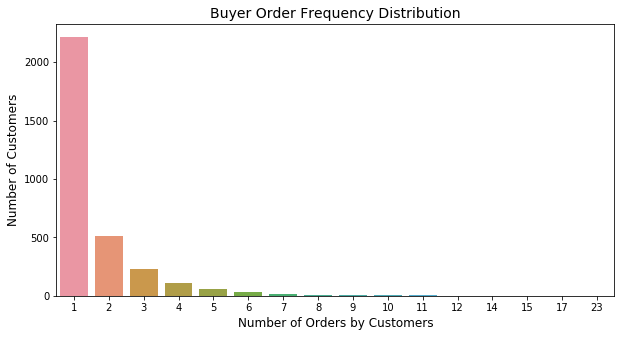

In [103]:
plt.figure(figsize=(10,5))
sns.countplot(opb['delivery_id'])
plt.title("Buyer Order Frequency Distribution", fontsize = 14)
plt.xlabel("Number of Orders by Customers", fontsize =12)
plt.ylabel("Number of Customers", fontsize =12)
plt.xticks(fontsize=10);

About 70% of buyer drop off after 1 purchase. We can roll out win-back/reactivation strategy and promotions. Retention Strategy would play crucial role to increase the business. 

In [104]:
#orders delivered by Jumpman
odj = master.groupby('jumpman_id')['delivery_id'].count().reset_index().sort_values(by='delivery_id', ascending=False)
odj.head()

,jumpman_id,delivery_id
359,142394,67
182,99219,67
199,104533,67
33,30743,52
0,3296,50


In [105]:
odj.delivery_id.value_counts().sort_index().head(10)

1     106
2      60
3      50
4      48
5      28
6      30
7      23
8      22
9      20
10     21
Name: delivery_id, dtype: int64

In [106]:
odj.delivery_id.value_counts(normalize=1).sort_index().head(10)

1     0.183391
2     0.103806
3     0.086505
4     0.083045
5     0.048443
6     0.051903
7     0.039792
8     0.038062
9     0.034602
10    0.036332
Name: delivery_id, dtype: float64

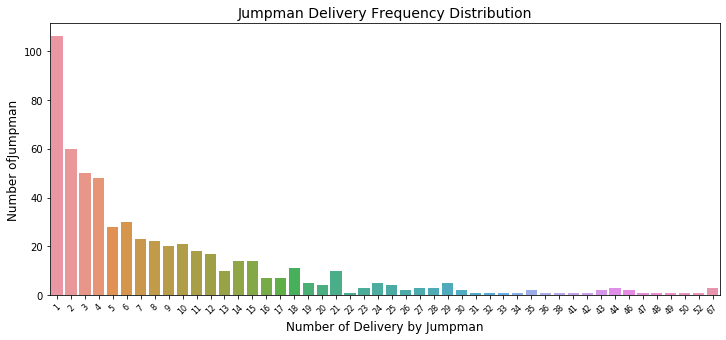

In [107]:
plt.figure(figsize=(12,5))
sns.countplot(odj['delivery_id'])
plt.title("Jumpman Delivery Frequency Distribution", fontsize = 14)
plt.xlabel("Number of Delivery by Jumpman", fontsize =12)
plt.ylabel("Number ofJumpman", fontsize =12)
plt.xticks(rotation=45,fontsize=8);

Supply side is strong. We need to activate more frequent Jumpman. Maintaining payment structure to retain them would be crucial to handle higher demand

#### Let's observe market demand

In [108]:
demand_dow = master['dow'].value_counts(normalize=1).sort_index()
demand_dow 

# 0 = Monday

0    0.116417
1    0.122555
2    0.149022
3    0.152858
4    0.134829
5    0.141542
6    0.182777
Name: dow, dtype: float64

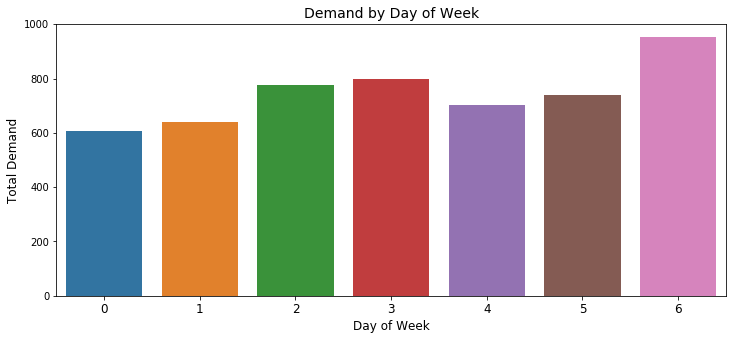

In [109]:
plt.figure(figsize=(12,5))
sns.countplot(master['dow'])
plt.title("Demand by Day of Week", fontsize = 14)
plt.xlabel("Day of Week", fontsize =12)
plt.ylabel("Total Demand", fontsize =12)
plt.xticks(fontsize=12);

We have the highest demand on Sunday. We can also see slightly higher demand on Wednesday and Thursday.Let's observe demand by hour

In [110]:
demand_hour = master['hour'].value_counts(normalize=1).sort_index()
demand_hour

0     0.019563
1     0.008822
2     0.005178
3     0.003452
4     0.000575
5     0.000575
6     0.000384
7     0.001534
8     0.003260
9     0.007480
10    0.018028
11    0.035481
12    0.060414
13    0.065017
14    0.053510
15    0.046797
16    0.043345
17    0.051784
18    0.081895
19    0.128500
20    0.149405
21    0.117568
22    0.064634
23    0.032796
Name: hour, dtype: float64

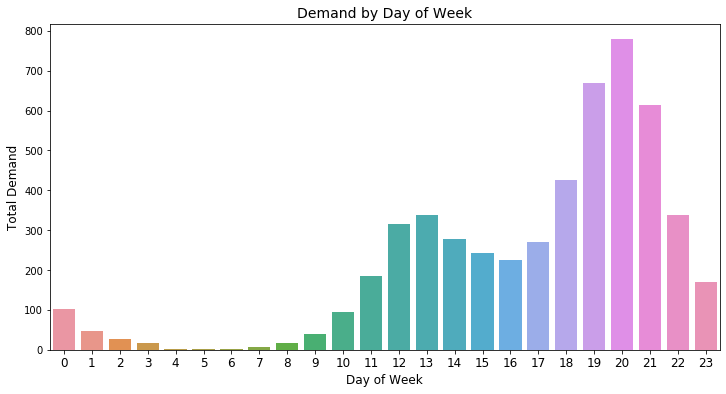

In [111]:
plt.figure(figsize=(12,6))
sns.countplot(master['hour'])
plt.title("Demand by Day of Week", fontsize = 14)
plt.xlabel("Day of Week", fontsize =12)
plt.ylabel("Total Demand", fontsize =12)
plt.xticks(fontsize=12);

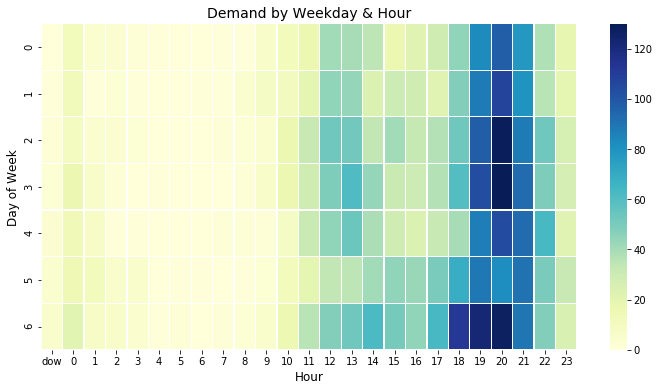

In [112]:
pt = master.pivot_table(index='dow', columns='hour', values="delivery_id", aggfunc="count").fillna(0).sort_index().reset_index()

plt.figure(figsize=(12,6))
sns.heatmap(pt, cmap="YlGnBu", linewidths=.3)
plt.title("Demand by Weekday & Hour", fontsize = 14)
plt.xlabel("Hour", fontsize =12)
plt.ylabel("Day of Week", fontsize =12)
plt.xticks(fontsize=10);

Overall, peak hour for each weekday is between 6PM to 10PM. We need to make sure to have enough Jumpman with experience to handle these hours. We also can see opportunity grow for lunch hours. 

#### Now, let's briefly analyze customer experience

In [113]:
# total duration for delivery
master['total_time_min'] = master.when_the_Jumpman_arrived_at_dropoff - master.when_the_delivery_started
master['total_time_min'] = master['total_time_min']/np.timedelta64(1,'m')

#delivery start to pick up
master['to_pick_up_min'] = master.when_the_Jumpman_arrived_at_pickup - master.when_the_delivery_started
master['to_pick_up_min'] = master['to_pick_up_min']/np.timedelta64(1,'m')

# pick up wait time 
master['pick_up_time_min'] = master.when_the_Jumpman_left_pickup -  master.when_the_Jumpman_arrived_at_pickup
master['pick_up_time_min'] = master['pick_up_time_min']/np.timedelta64(1,'m')

# travel duration from pick up to drop off location
master['delivery_time_min'] = master.when_the_Jumpman_arrived_at_dropoff - master.when_the_Jumpman_left_pickup
master['delivery_time_min'] = master['delivery_time_min']/np.timedelta64(1,'m')

master[['total_time_min', 'to_pick_up_min', 'pick_up_time_min', 'delivery_time_min']].describe()

,total_time_min,to_pick_up_min,pick_up_time_min,delivery_time_min
count,5214.000000,4719.000000,4719.000000,4719.000000
mean,45.216308,12.588740,18.294248,14.041480
std,19.687987,12.231923,11.715884,9.314023
min,3.047181,-2.651465,0.001877,0.839419
25%,32.122191,3.509269,10.369364,7.938390
50%,42.020648,9.876013,15.333771,11.658124
75%,54.240649,18.749896,22.977090,17.304775
max,340.308810,142.090125,267.954044,119.190060


#### Data Integrity Issue # 3

Negative value under to_pick_up_min means timestamp was logged as arrived at pickup location before even delivery started. Maybe Jumpman was already at the location before an order came in to pick up, but this should be escalated.

Additionally, outliers seem to be wrong. Or, maybe there were some issues with orders. 

#### Note : If we ignore above errors, we are completing the whole process within 45 min average.

In [114]:
popular_cat = master['place_category'].value_counts().reset_index()#.sort_values(ascending=False)
popular_cat.columns = ['place_category', 'count']
popular_cat.head(20)

,place_category,count
0,Italian,437
1,Burger,395
2,American,357
3,Japanese,335
4,Dessert,277
5,Chinese,265
6,Sushi,203
7,Salad,192
8,Mexican,165
9,Grocery Store,130


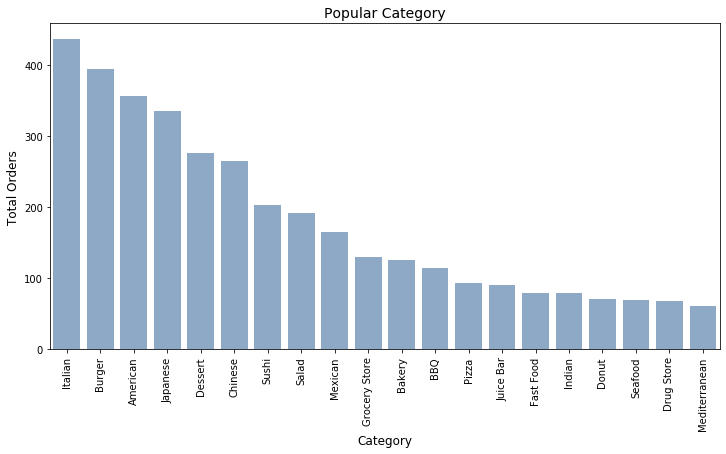

In [115]:
top_cat = master['place_category'].value_counts().head(20)

plt.figure(figsize=(12,6))
sns.barplot(top_cat.index, top_cat.values, alpha=0.5, color=color[5])
plt.title("Popular Category", fontsize = 14)
plt.xlabel("Category", fontsize =12)
plt.ylabel("Total Orders", fontsize =12)
plt.xticks(rotation='vertical', fontsize=10);

In [116]:
pop_place = master['pickup_place'].value_counts().reset_index()#.sort_values(ascending=False)
pop_place.columns = ['pickup_place', 'count']
pop_place.head(20)

,pickup_place,count
0,Shake Shack,266
1,Momofuku Milk Bar,162
2,The Meatball Shop,153
3,sweetgreen,138
4,Blue Ribbon Fried Chicken,115
5,Blue Ribbon Sushi,111
6,Parm,89
7,Whole Foods Market,85
8,Chipotle Mexican Grill $1.99 Delivery,79
9,Mighty Quinn's BBQ,76


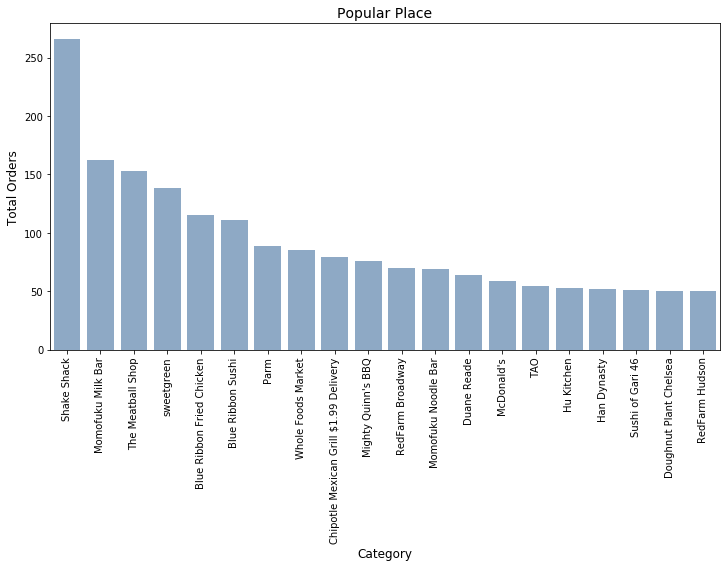

In [117]:
pop_place = master['pickup_place'].value_counts().head(20)

plt.figure(figsize=(12,6))
sns.barplot(pop_place.index, pop_place.values, alpha=0.5, color=color[5])
plt.title("Popular Place", fontsize = 14)
plt.xlabel("Category", fontsize =12)
plt.ylabel("Total Orders", fontsize =12)
plt.xticks(rotation='vertical', fontsize=10);

#### Let's calculate distance between pickup location and dropoff location

In [118]:
from geopy.distance import vincenty

def distance_calc (row):
    start = (row['pickup_lat'], row['pickup_lon'])
    stop = (row['dropoff_lat'], row['dropoff_lon'])

    return vincenty(start, stop).meters

In [119]:
master['distance'] = master.apply(lambda row: distance_calc (row), axis=1)
master.head()

/home/artekki/anaconda3/envs/artekki_env/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  import sys


,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,...,item_quantity_sum,year,wom,dow,hour,total_time_min,to_pick_up_min,pick_up_time_min,delivery_time_min,distance
1,1457973,327168,162381,van,Melt Shop,American,00:19:58.582052,40.744607,-73.990742,40.752073,...,2.0,2014,4,6,14,60.106903,NaN,NaN,NaN,945.069831
2,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,00:25:09.107093,40.723080,-73.994615,40.719722,...,3.0,2014,3,3,22,60.404899,27.057767,22.349505,10.997627,439.633124
3,1476547,83095,132725,bicycle,Bareburger,Burger,00:06:44.541717,40.728478,-73.998392,40.728606,...,1.0,2014,4,1,22,24.799676,-2.564350,21.853190,5.510836,274.826231
4,1485494,271149,157175,bicycle,Juice Press,Juice Bar,NaN,40.738868,-74.002747,40.751257,...,1.0,2014,5,3,11,38.442636,10.103795,12.335604,16.003237,1397.296024
5,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,00:03:45.035418,40.726110,-74.002492,40.709323,...,2.0,2014,2,4,0,41.145001,7.404195,10.611635,23.129172,2179.897414


#### we now have all the fields we need to create a linear regression model to predict total_delivery time!

In [120]:
#dropping data with integrity issue with timestamp

master.drop(master[master['when_the_Jumpman_arrived_at_pickup'] < master['when_the_delivery_started']].index, inplace=True)
master.shape


(4776, 26)

In [121]:
#Create X and y

feature_cols = ['vehicle_type', 'distance', 'total_items', 'dow', 'hour']
X = master[feature_cols]
y = master.total_time_min

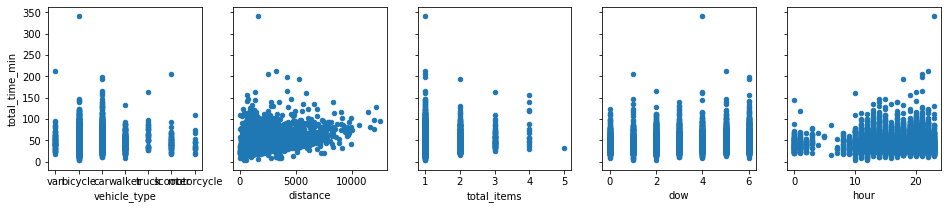

In [122]:
fig, axs = plt.subplots(1, len(feature_cols), sharey=True)
for index, feature in enumerate(feature_cols):
    master.plot(kind='scatter', x=feature, y='total_time_min', ax=axs[index], figsize=(16, 3))

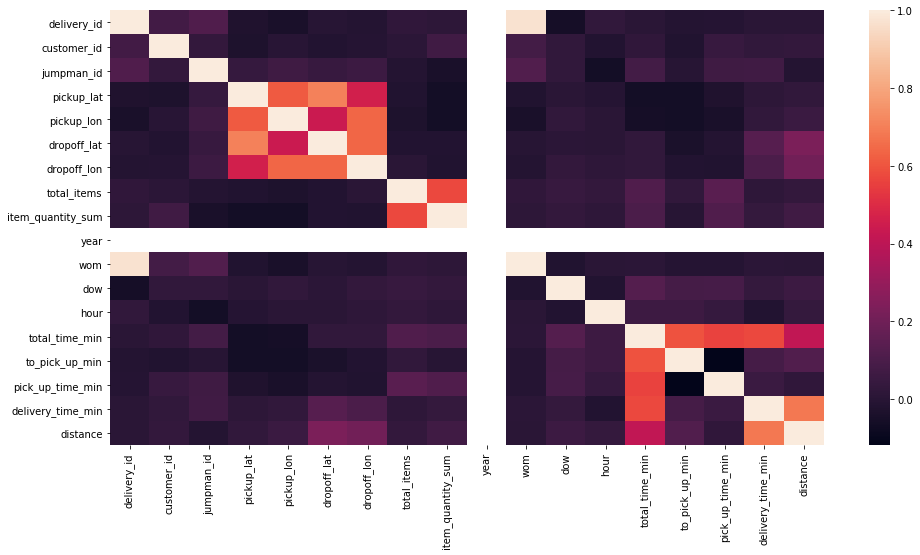

In [123]:
plt.figure(figsize=(16,8))
sns.heatmap(master.corr())

In [124]:
# Creating Dummy Variables for Vehicle type

vehicle_dummies = pd.get_dummies(master.vehicle_type, prefix='vehicle_type')

In [125]:
vehicle_dummies.drop(vehicle_dummies.columns[0], axis=1, inplace=True)

In [126]:
#concatenate the original DF and the dummy DF
master_dummies = pd.concat([master, vehicle_dummies], axis=1)

master_dummies.sample(n=10, random_state=1)

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,...,to_pick_up_min,pick_up_time_min,delivery_time_min,distance,vehicle_type_car,vehicle_type_motorcycle,vehicle_type_scooter,vehicle_type_truck,vehicle_type_van,vehicle_type_walker
2669,1442583,339923,142394,bicycle,Katz's Delicatessen,NaN,NaN,40.722307,-73.987352,40.728421,...,8.058483,17.719217,6.009587,771.368988,0,0,0,0,0,0
3173,1302442,81110,40526,bicycle,Han Dynasty,Chinese,00:07:11.492769,40.732213,-73.988072,40.742733,...,4.206028,26.337747,10.654494,1322.130648,0,0,0,0,0,0
2310,1340235,128600,99219,bicycle,Blue Ribbon Fried Chicken,American,NaN,40.724340,-73.990960,40.716341,...,0.360924,14.787187,16.628209,2008.796943,0,0,0,0,0,0
477,1357295,103017,36664,bicycle,Food Emporium,NaN,NaN,40.764192,-73.964473,40.765817,...,8.501726,11.868530,4.732510,199.314704,0,0,0,0,0,0
3940,1397850,142449,162603,car,Habana To Go,NaN,00:07:31.489452,40.722912,-73.994089,40.733716,...,NaN,NaN,NaN,1358.327608,1,0,0,0,0,0
5979,1303444,228541,148268,bicycle,RedFarm Hudson,Chinese,00:03:32.094164,40.734214,-74.006202,40.732425,...,12.659345,23.842564,7.956391,862.284723,0,0,0,0,0,0
1393,1284844,170297,112646,bicycle,Breads Bakery,Bakery,NaN,40.736803,-73.991718,40.719145,...,34.964583,12.734738,17.351922,2445.503006,0,0,0,0,0,0
5579,1319539,131093,148268,bicycle,Hale & Hearty,Salad,NaN,40.737828,-73.992362,40.744918,...,3.383045,17.695993,10.529578,1468.725058,0,0,0,0,0,0
4891,1462146,342664,127402,scooter,Risotteria,NaN,NaN,40.731484,-74.003149,40.726739,...,8.230582,22.828707,5.963223,951.012759,0,0,1,0,0,0
1664,1451748,74700,169956,car,RedFarm Hudson,Chinese,00:06:40.336457,40.734214,-74.006202,40.733003,...,15.106317,8.830542,13.208509,1348.006199,1,0,0,0,0,0


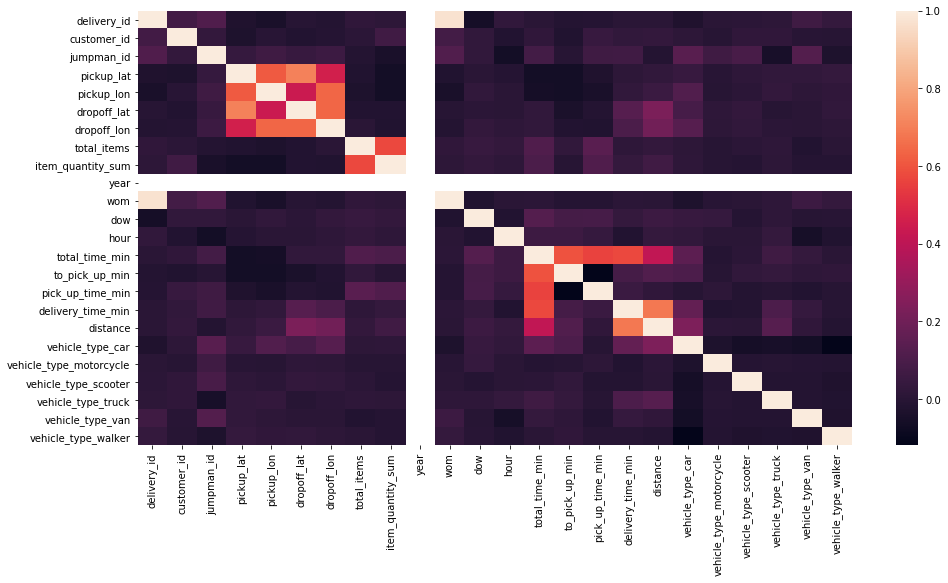

In [127]:
plt.figure(figsize=(16,8))
sns.heatmap(master_dummies.corr())

In [128]:
master_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4776 entries, 1 to 5981
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   delivery_id                          4776 non-null   int64         
 1   customer_id                          4776 non-null   int64         
 2   jumpman_id                           4776 non-null   int64         
 3   vehicle_type                         4776 non-null   object        
 4   pickup_place                         4776 non-null   object        
 5   place_category                       4007 non-null   object        
 6   how_long_it_took_to_order            2408 non-null   object        
 7   pickup_lat                           4776 non-null   float64       
 8   pickup_lon                           4776 non-null   float64       
 9   dropoff_lat                          4776 non-null   float64       
 10  dropoff_lon 

In [129]:
#Include dummy variables for season in the model 

feature_cols = [
    'vehicle_type_car', 
    'vehicle_type_motorcycle', 
    'vehicle_type_scooter',
    'vehicle_type_truck',
    'vehicle_type_van',
    'vehicle_type_walker',
    'distance', 'dow', 'hour'
]

X = master_dummies[feature_cols]
y = master_dummies.total_time_min


In [130]:
#Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

In [131]:
#Fitting Multiple Linear Regression to the Training Set

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [132]:
# Predicting the TEst set results 

y_pred = linreg.predict(X_test)
y_pred

array([44.14467242, 45.98670945, 42.20960862, ..., 39.50840712,
       52.60716803, 36.72346661])

In [133]:
# Calculating the Coefficients and intercept
print(linreg.coef_)
print(linreg.intercept_)

[ 2.68195614e+00 -8.05962212e+00  2.45915505e+00  5.76009242e+00
  6.20844169e+00  1.39140809e+00  4.64703792e-03  1.16346477e+00
  2.27246371e-01]
29.141902814086865


In [134]:
list(zip(feature_cols, linreg.coef_))

[('vehicle_type_car', 2.6819561372370395),
 ('vehicle_type_motorcycle', -8.059622116215483),
 ('vehicle_type_scooter', 2.4591550545708065),
 ('vehicle_type_truck', 5.760092422786196),
 ('vehicle_type_van', 6.208441686698106),
 ('vehicle_type_walker', 1.3914080868862955),
 ('distance', 0.004647037921233605),
 ('dow', 1.163464765432388),
 ('hour', 0.22724637070630133)]

In [135]:
#Calculating the R suared value 
from sklearn import metrics

r2_score(y_test, y_pred)

0.19782582854131148

In [136]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

17.442477437969096

#### This is not a good model. We need better modeling. Let's build a test model that can apply different sets of features

In [137]:
# dropping data that has integrity issue

master_dummies = master_dummies[master_dummies['total_items'].notna()]
master_dummies = master_dummies[master_dummies['item_quantity_sum'].notna()]
master_dummies = master_dummies[master_dummies['pick_up_time_min'].notna()]
master_dummies.shape
#'pick_up_time_min'

(4281, 32)

#### adding more features

In [138]:

feature_cols2 = [
    'vehicle_type_car', 
    'vehicle_type_motorcycle', 
    'vehicle_type_scooter',
    'vehicle_type_truck',
    'vehicle_type_van',
    'vehicle_type_walker',
    'distance', 'hour', 'dow'
]

X = master_dummies[feature_cols2]
y = master_dummies.total_time_min


In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)
y_pred

array([53.91890853, 34.65560391, 52.01813107, ..., 40.62887286,
       58.43224236, 53.97011603])

In [140]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

15.760452051201788

In [141]:
r2_score(y_test, y_pred)

0.24108037155414885

#### Trying 70/30 Split

In [142]:
#trying 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

In [143]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

15.59600454060928

In [144]:
r2_score(y_test, y_pred)

0.2245294931085463

#### Trying 80/20 Split

In [145]:
#trying 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

In [146]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

15.76615351402131

In [147]:
r2_score(y_test, y_pred)

0.2373987426253874

#### Trying 90/10 Split

In [148]:
#trying 90/10 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

In [149]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

14.318645908683328

In [150]:
r2_score(y_test, y_pred)

0.25208003155209147

#### Comparing Testing RMSE with Null RMSE

In [151]:
# Split X and y into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create a NumPy array with the same shape as y_test.
y_null = np.zeros_like(y_test, dtype=float)

# Fill the array with the mean value of y_test.
y_null.fill(y_test.mean())
y_null

array([45.97503013, 45.97503013, 45.97503013, ..., 45.97503013,
       45.97503013, 45.97503013])

In [152]:
# Compute null RMSE.
np.sqrt(metrics.mean_squared_error(y_test, y_null))

20.93201569328635

In [153]:
r2_score(y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [1071, 429]

#### Create a cross-valiation with five folds.


In [154]:
from sklearn import model_selection


In [155]:
kf = model_selection.KFold(n_splits=5, shuffle=True)


In [156]:
mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 315.17091124702455
R2: 0.19381363051903389

Model 2
MSE: 355.28369128082124
R2: 0.1934632203507225

Model 3
MSE: 263.32964934032356
R2: 0.19399045901025458

Model 4
MSE: 270.2922482009959
R2: 0.1935647683928884

Model 5
MSE: 252.35686860468329
R2: 0.19420366778096543

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 291.28667373476975
Mean of R2 for all folds: 0.19380714921077297


In [157]:
from sklearn.model_selection import cross_val_score

# Note the results will vary each run since we take a different
#   subset of the data each time (since shuffle=True)
kf = model_selection.KFold(n_splits=5, shuffle=True)

print(np.mean(-cross_val_score(lr, X, y, cv=kf, scoring='neg_mean_squared_error')))
print(np.mean(cross_val_score(lr, X, y, cv=kf)))

291.97629779609576
0.18971401227823984
